In [3]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import qmc
from scipy.stats import norm

In [102]:
def create_standard_bm(k, m, QMC, Sobol_not_Halton, scramble_func, mc_runs, d, delta_t):
    if QMC == False:
        #create lower trinangular matrix with ones
        BM = np.empty([mc_runs,d])
        np.random.seed(1)
        norm_rv = np.random.normal(0,1,size=(mc_runs, d))
        for i in range(mc_runs):
            lower_tri_matr = np.tril(np.ones([d,d]))
            A = math.sqrt(delta_t)*lower_tri_matr
            #create Brownian motion
            BM[i,:] = A.dot(norm_rv[i,:])
    elif QMC == True:
        if Sobol_not_Halton == True:
            BM = np.empty([mc_runs,d])
            norm_rv = Sobol_seq_normal_transformed(d, m, scramble_func)
            for i in range(mc_runs):
                lower_tri_matr = np.tril(np.ones([d,d]))
                A = math.sqrt(delta_t)*lower_tri_matr
                #create Brownian motion
                BM[i,:] = A.dot(norm_rv[i,:])
        elif Sobol_not_Halton == False:
            BM = np.empty([mc_runs,d])
            norm_rv = Halton_seq_normal_transformed(d, mc_runs, scramble_func)
            for i in range(mc_runs):
                lower_tri_matr = np.tril(np.ones([d,d]))
                A = math.sqrt(delta_t)*lower_tri_matr
                #create Brownian motion
                BM[i,:] = A.dot(norm_rv[i,:])

    return BM

In [98]:
def create_asset_prices(k, m, QMC, Sobol_not_Halton, scramble_func, BB, mc_runs, d, delta_t, S_0, mu, sigma):
    S = np.empty([mc_runs, d+1]) #+1 weil d mal simuliert wird und aber der Startpreis des Assets auch in dem Vektor steht
    
    S[:,0] = S_0

    if BB == True:
        BM = create_BB(k, m, QMC, Sobol_not_Halton, scramble_func, mc_runs, d, delta_t)
        BM = BM[:,1:len(BM)] #um B_0 abzuschneiden
    else:
        BM = create_standard_bm(k, m, QMC, Sobol_not_Halton, scramble_func, mc_runs, d, delta_t)  #w_0 ist nciht dabei aber interessiert mich auch nicht

    for k in range(mc_runs):
        for i in range(d):
            S[k, i+1] = S[k, 0]*np.exp(sigma*BM[k, i] + (mu-(sigma**2)/2)*(i+1)*delta_t)
    return S
    

In [99]:
T = 1
k = 8
d = 2**k     #2er-Potenz für Brownian Bridge
delta_t = T/d

S_0 = 100


m = 3
mc_runs = 2**m    #Für Sobol sequence


QMC = False
Sobol_not_Halton = False
scramble_func = True


BB = False

In [103]:
mu = 0.01
sigma = 0.3
output1 = create_asset_prices(k, m, QMC, Sobol_not_Halton, scramble_func, BB, mc_runs, d, delta_t, S_0, mu, sigma)
mu = 0.01
sigma = 1
output2 = create_asset_prices(k, m, QMC, Sobol_not_Halton, scramble_func, BB, mc_runs, d, delta_t, S_0, mu, sigma)
mu = 0.4
sigma = 0.3
output3 = create_asset_prices(k, m, QMC, Sobol_not_Halton, scramble_func, BB, mc_runs, d, delta_t, S_0, mu, sigma)
mu = 0.4
sigma = 1
output4 = create_asset_prices(k, m, QMC, Sobol_not_Halton, scramble_func, BB, mc_runs, d, delta_t, S_0, mu, sigma)



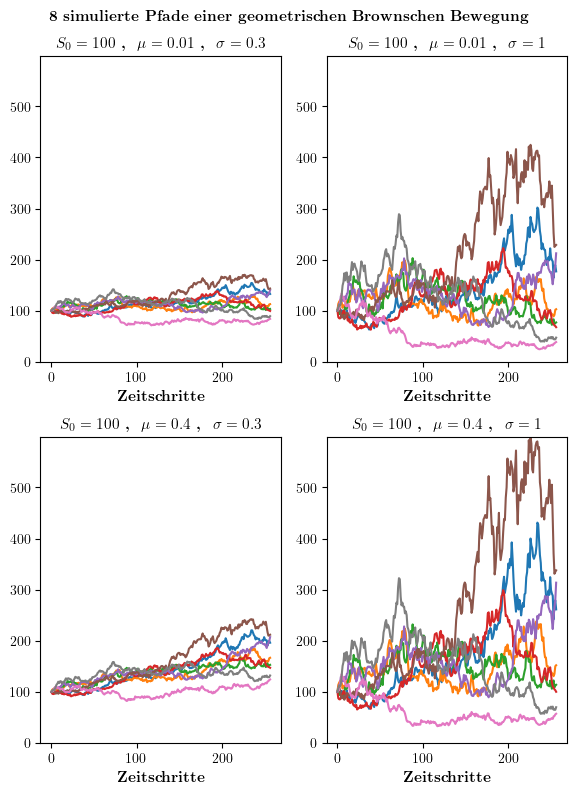

In [105]:
#fig, axs = plt.subplots(2, 2, sharex='all', sharey='all')
fig, axs = plt.subplots(2, 2)

fig.set_figheight(8.05748)
fig.set_figwidth(5.87086)

fig.tight_layout()


axs[0,0].set_ylim(bottom=0, top=np.max(output4))
axs[0,1].set_ylim(bottom=0, top=np.max(output4))
axs[1,0].set_ylim(bottom=0, top=np.max(output4))
axs[1,1].set_ylim(bottom=0, top=np.max(output4))

plt.rc('text', usetex=True)
plt.rc('font', family = 'Computer Modern')

axs[0, 0].plot(output1.T)
axs[0, 1].plot(output2.T)
axs[1, 0].plot(output3.T)
axs[1, 1].plot(output4.T)



plt.suptitle(r'\textbf{8 simulierte Pfade einer geometrischen Brownschen Bewegung}', fontsize = 11)
axs[0, 0].set_title(r'\textbf{$S_{0} = 100$ \textbf{, } $\mu = 0.01$ \textbf{, } $\sigma = 0.3$', fontsize = 11)
axs[0, 1].set_title(r'\textbf{$S_{0} = 100$ \textbf{, } $\mu = 0.01$ \textbf{, } $\sigma = 1$', fontsize = 11)
axs[1, 0].set_title(r'\textbf{$S_{0} = 100$ \textbf{, } $\mu = 0.4$ \textbf{, } $\sigma = 0.3$', fontsize = 11)
axs[1, 1].set_title(r'\textbf{$S_{0} = 100$ \textbf{, } $\mu = 0.4$ \textbf{, } $\sigma=  1$', fontsize = 11)

axs[0,0].set_xlabel(r'\textbf{Zeitschritte}', fontsize = 11)
axs[0,1].set_xlabel(r'\textbf{Zeitschritte}', fontsize = 11)
axs[1,0].set_xlabel(r'\textbf{Zeitschritte}', fontsize = 11)
axs[1,1].set_xlabel(r'\textbf{Zeitschritte}', fontsize = 11)

fig.savefig('GBM_diffParam_plot.png', dpi = 500)



<function matplotlib.pyplot.show(close=None, block=None)>

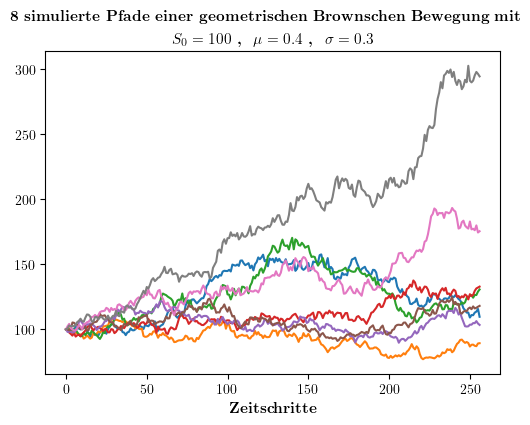

In [35]:
fig = plt.figure(figsize = (5.87086,4.1918))


plt.rc('text', usetex=True)
plt.rc('font', family = 'Computer Modern')

plt.plot(output.T)

plt.suptitle(r'\textbf{8 simulierte Pfade einer geometrischen Brownschen Bewegung mit }', fontsize = 11)
plt.title(r'\textbf{$S_{0} = 100$ \textbf{, } $\mu = 0.4$ \textbf{, } $\sigma = 0.3$', fontsize = 11)

plt.xlabel(r'\textbf{Zeitschritte}', fontsize = 11)
fig.savefig('standardBM_Asset_prices_plot_greatermy.png', dpi = 500)
plt.show